In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.svm
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, auc, roc_curve, RocCurveDisplay, \
    classification_report
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

np.set_printoptions(suppress=True)
np.set_printoptions(threshold=10)

import matplotlib.pyplot as plt
%matplotlib inline


# Initial analysis

## Load and print dataset

In [2]:
dataset = pd.read_csv('data/ps2_available_dataset.csv')
dataset

,treatment,age,blood_pressure,gender,blood_test,family_history,MeasureA,TestB,GeneA,GeneB,GeneC
0,1,74,94.113373,non-female,negative,False,-11.035690,-0.336843,double,1,0
1,1,56,83.337745,non-female,negative,False,-3.982345,-0.018734,none,1,1
2,0,37,81.759240,female,negative,False,6.205701,0.147933,double,1,1
3,1,54,88.549518,female,negative,False,-1.827613,-0.338373,none,1,1
4,0,73,82.171555,female,negative,NaN,-14.637389,-0.369325,none,1,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,1,49,89.036800,non-female,negative,False,-1.384107,-0.333167,double,1,0
9996,0,64,90.848126,non-female,negative,NaN,-6.560963,-0.015892,double,1,0
9997,0,54,82.028043,female,negative,False,-3.192784,-0.317267,none,1,0
9998,1,54,82.246645,female,negative,False,-4.138708,-0.042504,double,1,1


## Explore the dataset

In [3]:
dataset.describe()

,treatment,age,blood_pressure,MeasureA,TestB,GeneB,GeneC
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.358700,60.032800,84.642355,-5.992414,0.004466,0.547900,0.550400
std,0.479643,8.106546,5.266045,4.168837,0.322338,0.497725,0.497478
min,0.000000,29.000000,-99.000000,-21.708000,-0.564197,0.000000,0.000000
25%,0.000000,55.000000,82.314030,-8.790691,-0.251337,0.000000,0.000000
50%,0.000000,60.000000,83.997305,-5.956422,-0.039662,1.000000,1.000000
75%,1.000000,66.000000,86.342954,-3.217110,0.215928,1.000000,1.000000
max,1.000000,92.000000,107.595583,8.889658,1.231447,1.000000,1.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   treatment       10000 non-null  int64  
 1   age             10000 non-null  int64  
 2   blood_pressure  10000 non-null  float64
 3   gender          10000 non-null  object 
 4   blood_test      10000 non-null  object 
 5   family_history  7068 non-null   object 
 6   MeasureA        10000 non-null  float64
 7   TestB           10000 non-null  float64
 8   GeneA           10000 non-null  object 
 9   GeneB           10000 non-null  int64  
 10  GeneC           10000 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 859.5+ KB


In [5]:
dataset.isnull().sum()

treatment            0
age                  0
blood_pressure       0
gender               0
blood_test           0
family_history    2932
MeasureA             0
TestB                0
GeneA                0
GeneB                0
GeneC                0
dtype: int64

In [6]:
print(dataset.nunique())

treatment             2
age                  59
blood_pressure     9996
gender                2
blood_test            2
family_history        2
MeasureA          10000
TestB             10000
GeneA                 3
GeneB                 2
GeneC                 2
dtype: int64


## Select numerical and categorical features

In [7]:
num_cols = ['age', 'blood_pressure', 'MeasureA', 'TestB']
cat_features = ['gender', 'blood_test', 'family_history', 'GeneA', 'GeneB', 'GeneC']
target_columnt = 'treatment'

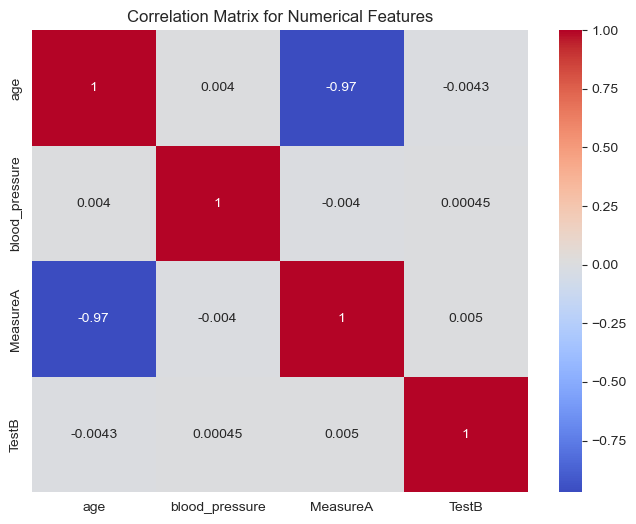

In [8]:
corr = dataset[num_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Features')
plt.show()

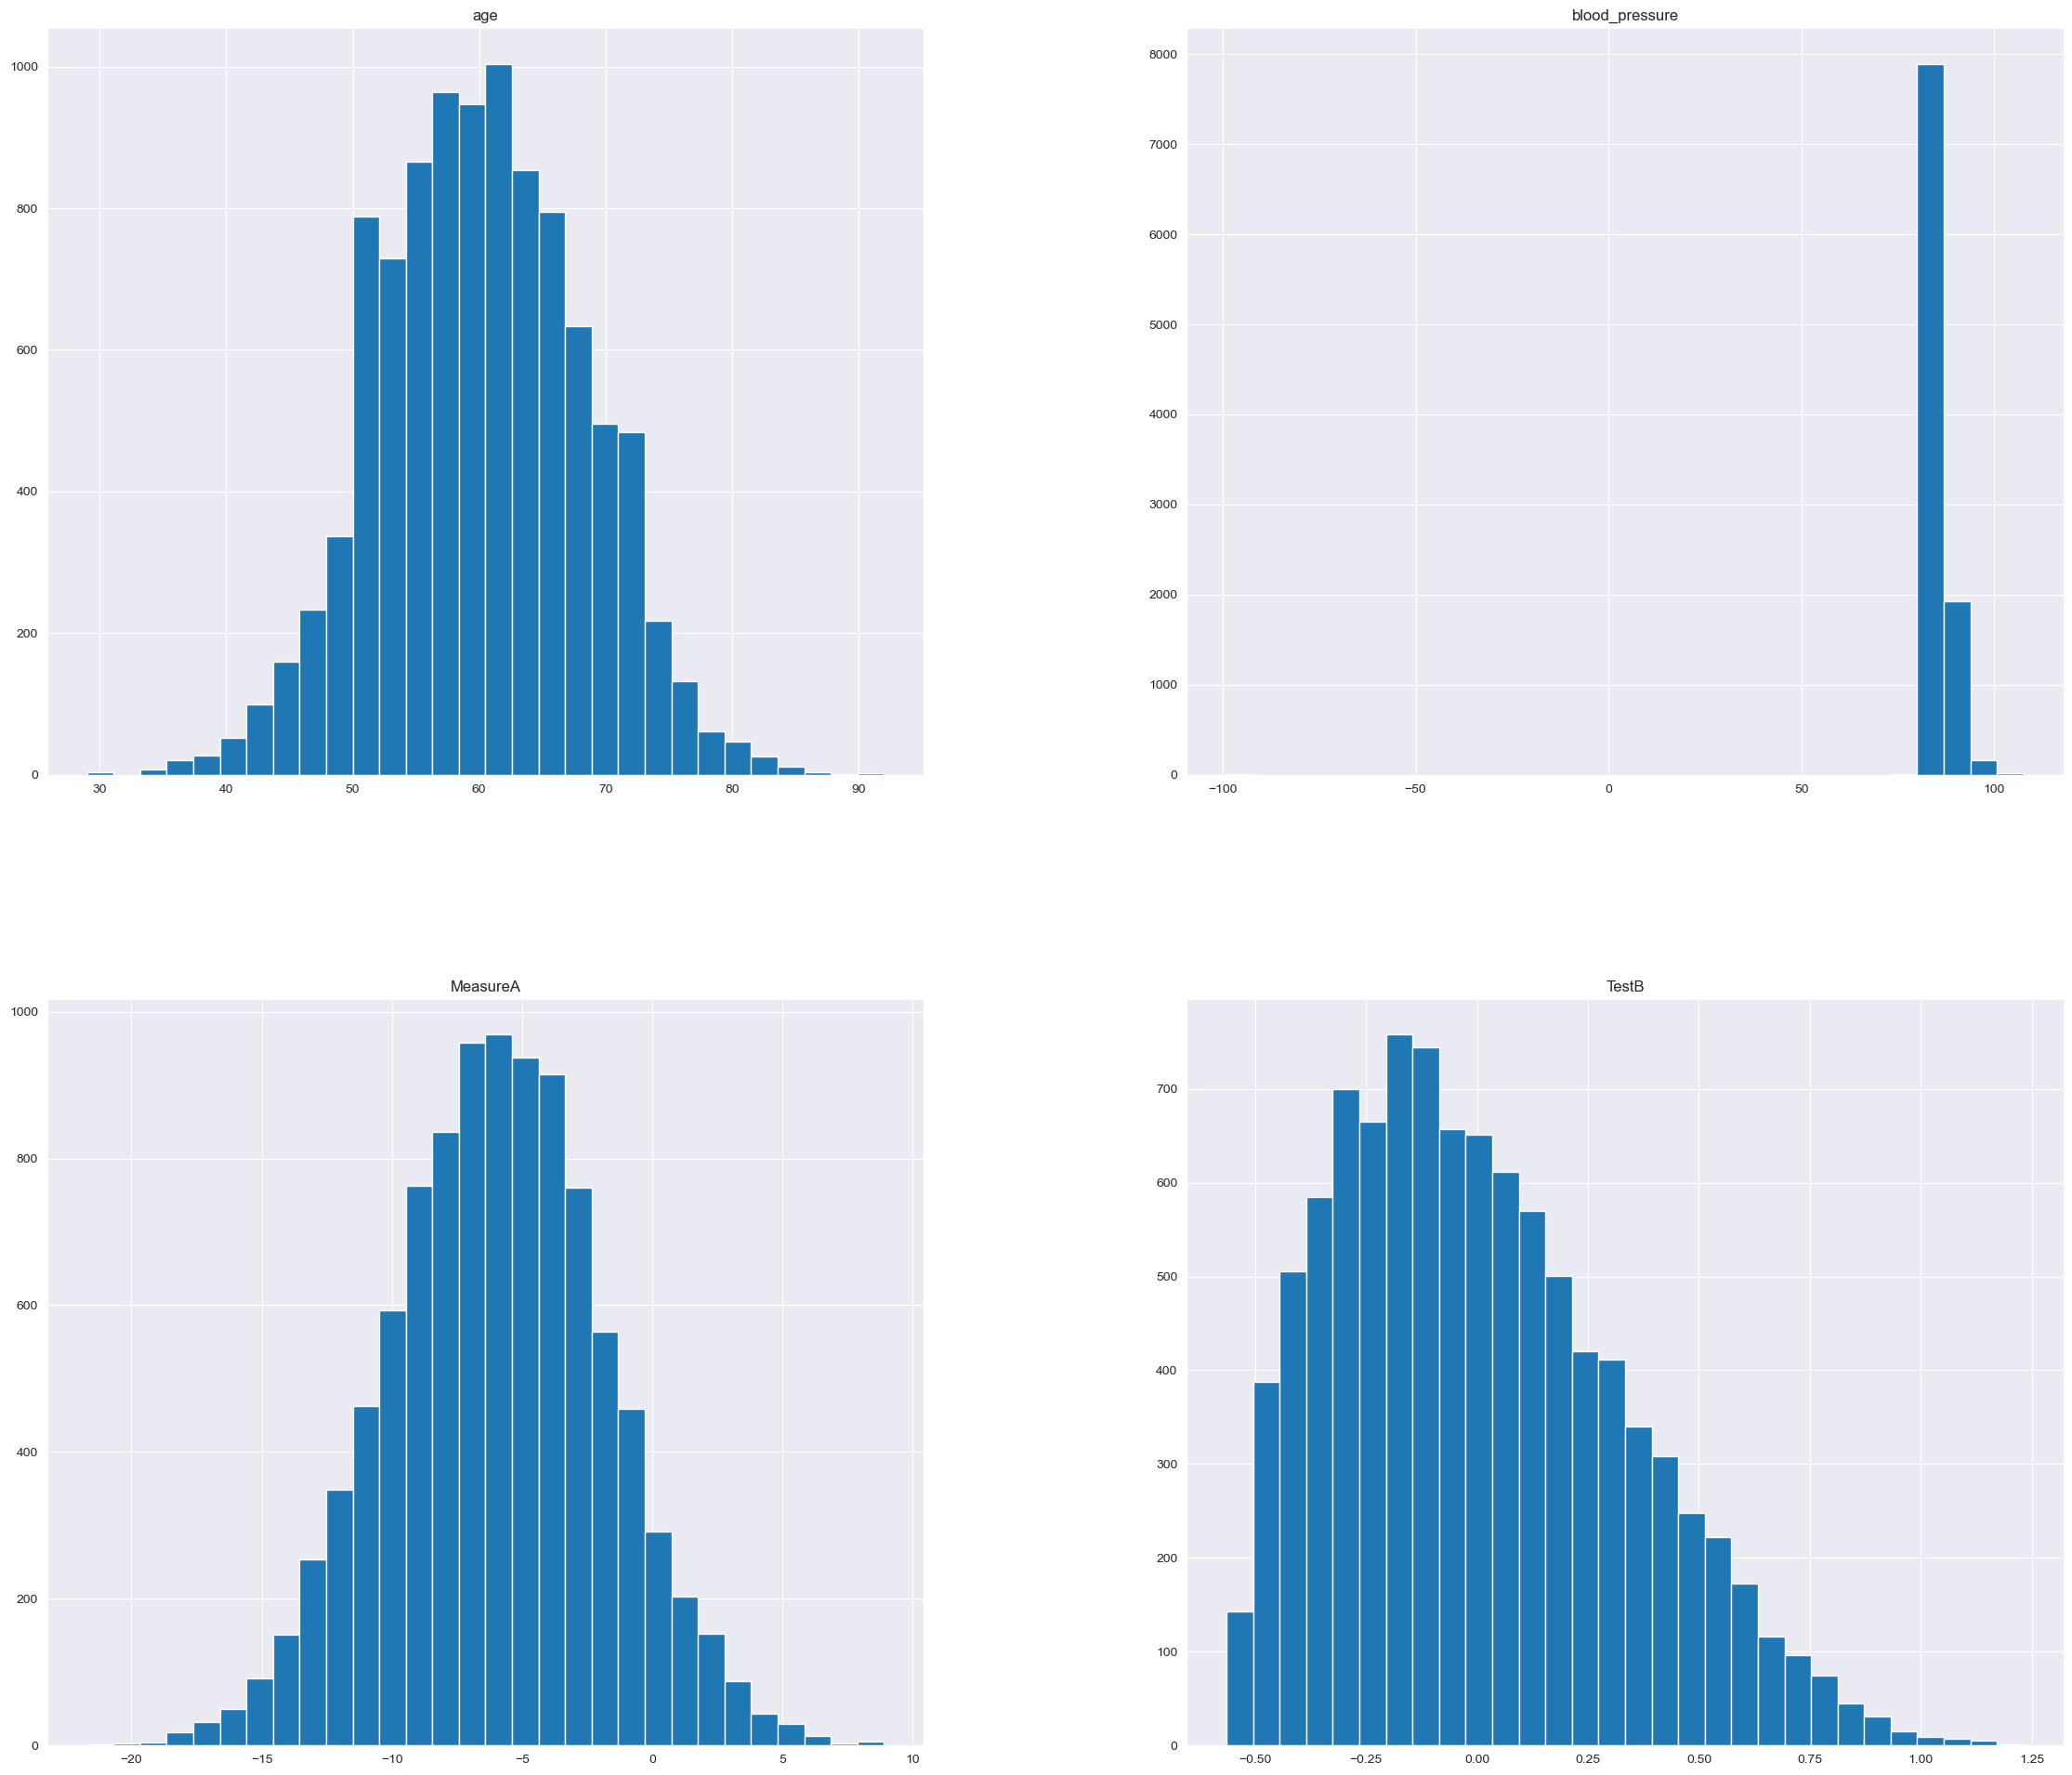

In [9]:
dataset[num_cols].hist(bins=30, figsize=(28, 24))
plt.show()

Target Variable Distribution:
treatment
0    64.13
1    35.87
Name: proportion, dtype: float64


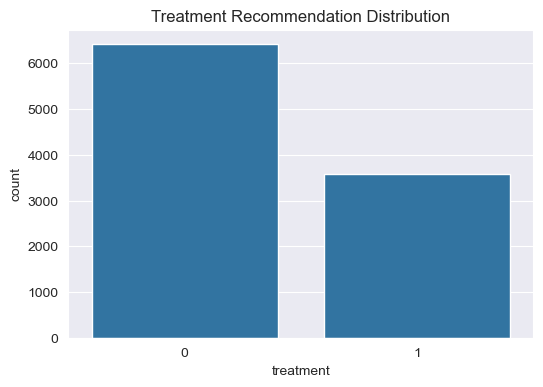

In [10]:
print("Target Variable Distribution:")
print(dataset['treatment'].value_counts(normalize=True) * 100)

plt.figure(figsize=(6, 4))
sns.countplot(x='treatment', data=dataset)
plt.title('Treatment Recommendation Distribution')
plt.show()

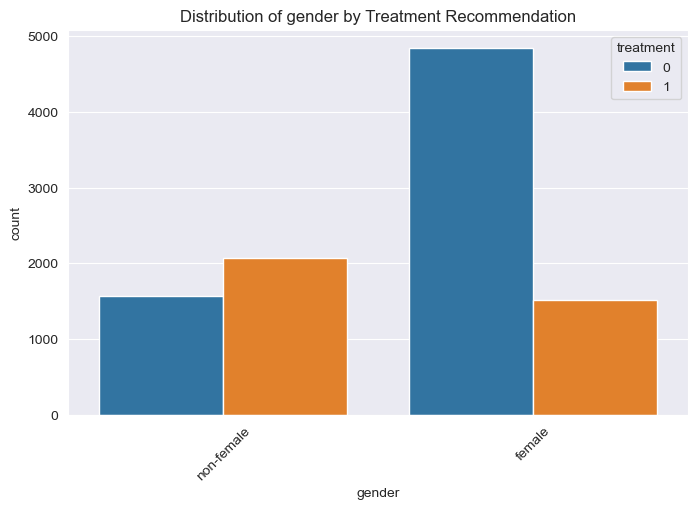

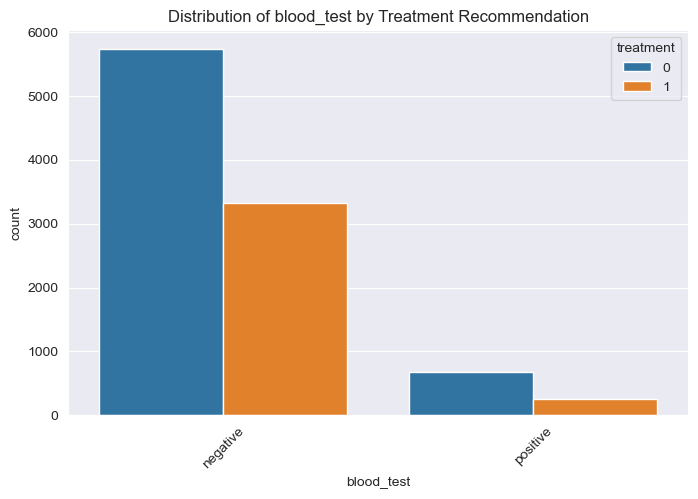

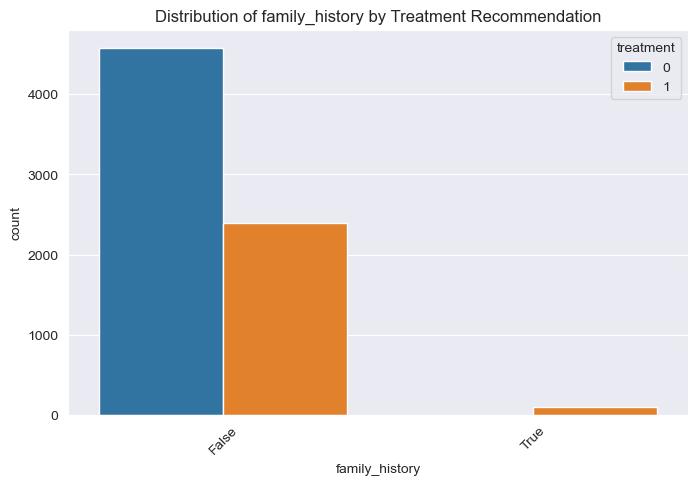

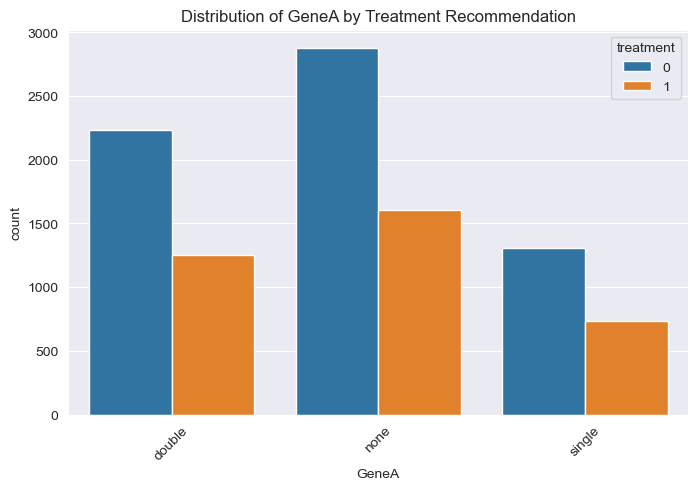

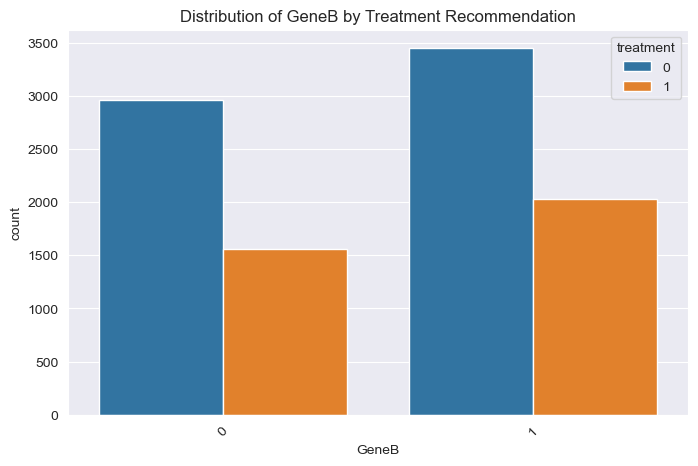

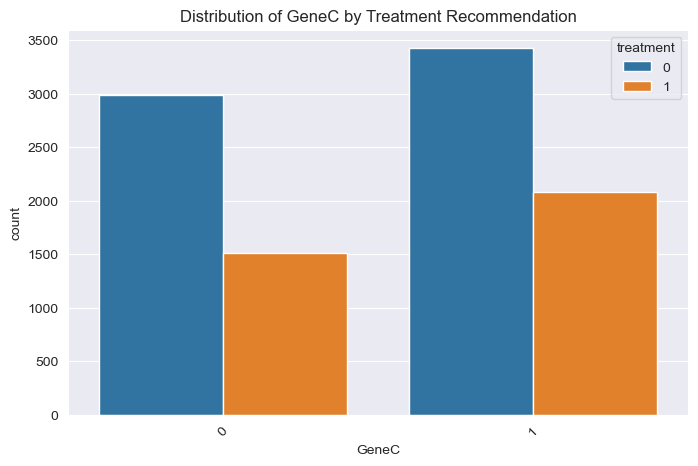

In [11]:
for col in cat_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='treatment', data=dataset)
    plt.title(f'Distribution of {col} by Treatment Recommendation')
    plt.xticks(rotation=45)
    plt.show()

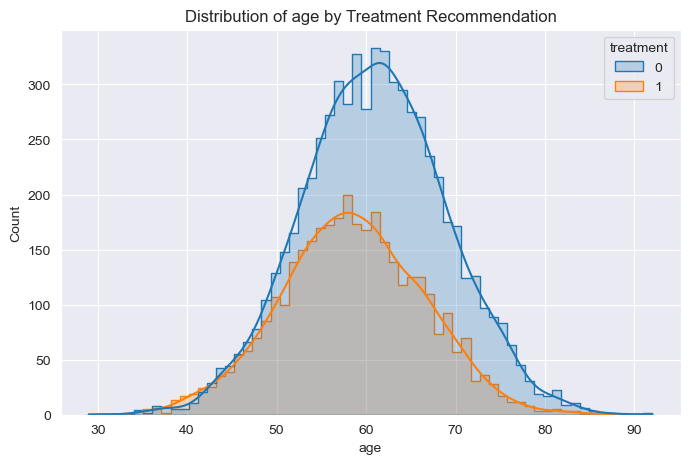

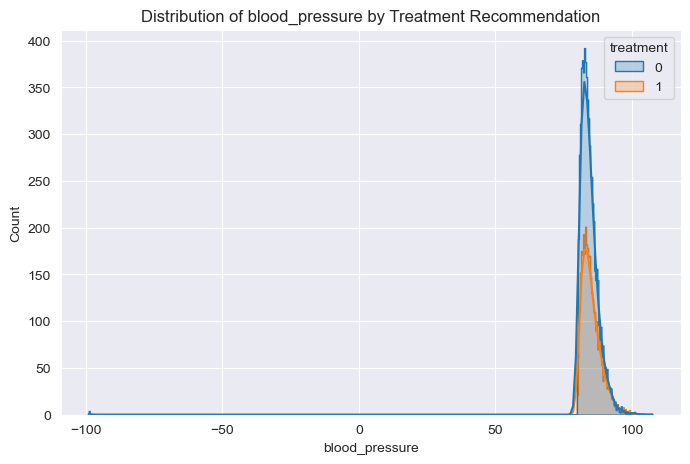

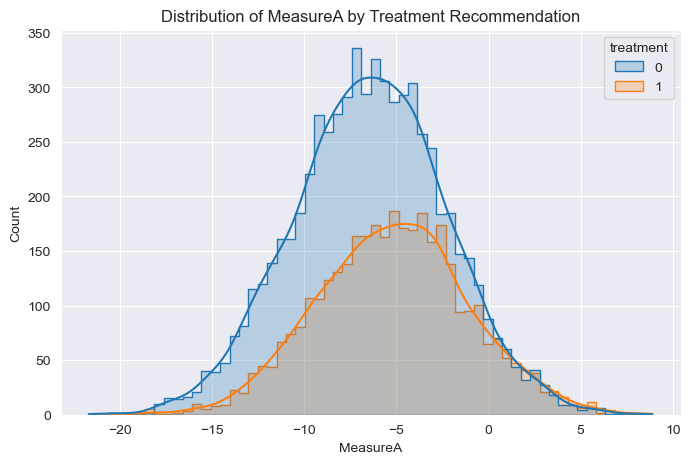

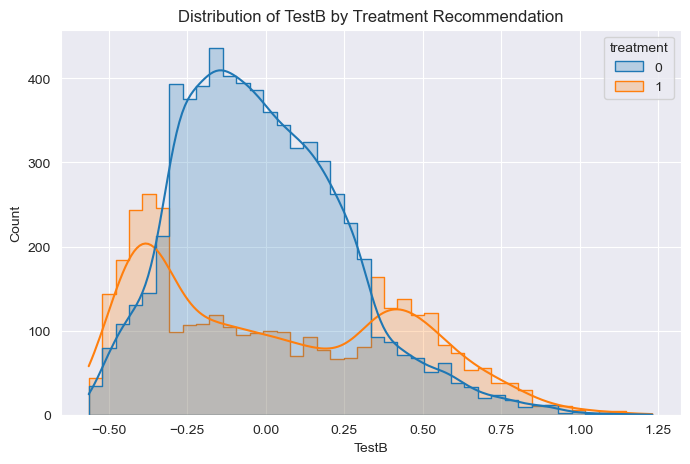

In [12]:
for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=dataset, x=col, hue='treatment', kde=True, element='step')
    plt.title(f'Distribution of {col} by Treatment Recommendation')
    plt.show()

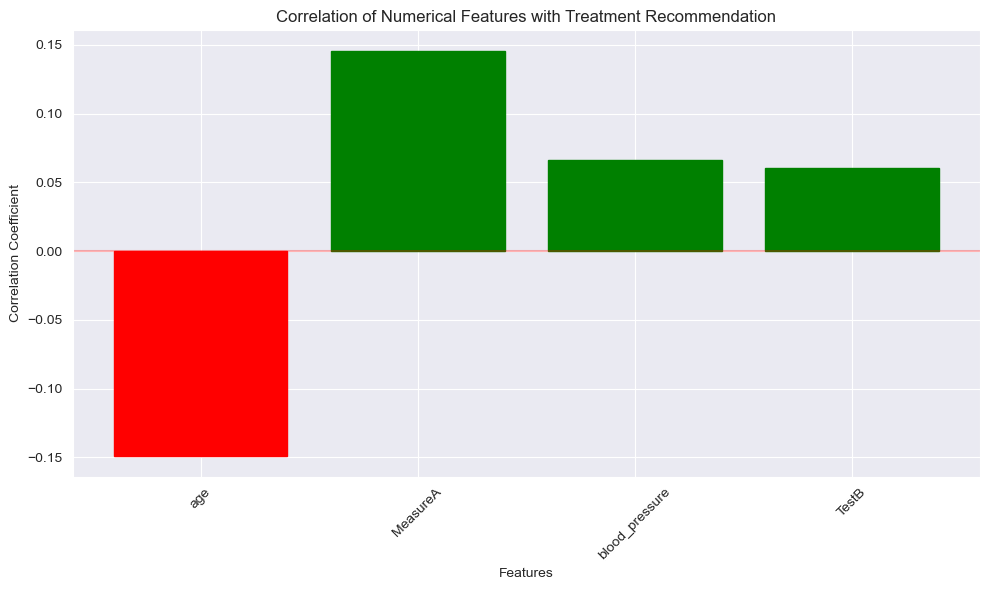

Chi-square test results for categorical features:
gender: chi2 = 1089.30, p-value = 0.0000
blood_test: chi2 = 28.27, p-value = 0.0000
family_history: chi2 = 183.40, p-value = 0.0000
GeneA: chi2 = 0.01, p-value = 0.9930
GeneB: chi2 = 7.23, p-value = 0.0072
GeneC: chi2 = 19.08, p-value = 0.0000


In [13]:
# Correlation with target variable (point-biserial for numerical features)
target_correlations = {}

for col in num_cols:
    correlation = dataset[col].corr(dataset['treatment'])
    target_correlations[col] = correlation

sorted_correlations = {k: v for k, v in sorted(target_correlations.items(),
                                               key=lambda item: abs(item[1]),
                                               reverse=True)}

plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_correlations.keys(), sorted_correlations.values())
plt.title('Correlation of Numerical Features with Treatment Recommendation')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.xticks(rotation=45)

for i, bar in enumerate(bars):
    if list(sorted_correlations.values())[i] < 0:
        bar.set_color('red')
    else:
        bar.set_color('green')

plt.tight_layout()
plt.show()

from scipy.stats import chi2_contingency

chi2_results = {}

for feature in cat_features:
    contingency = pd.crosstab(dataset[feature], dataset['treatment'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    chi2_results[feature] = {'chi2': chi2, 'p-value': p}

print("Chi-square test results for categorical features:")
for feature, result in chi2_results.items():
    print(f"{feature}: chi2 = {result['chi2']:.2f}, p-value = {result['p-value']:.4f}")

## Split the dataset into train, validation and test sets

In [14]:
# Create random indices
np.random.seed(44)
N = len(dataset)
shuffled_indices = np.random.permutation(N)

# Split indices into train, validation and test sets
train_indices = shuffled_indices[:int(N * 0.6)]
valid_indices = shuffled_indices[int(N * 0.6):int(N * 0.8)]
test_indices = shuffled_indices[int(N * 0.8):]

#  Split data into train, validation and test sets
train_set = dataset.iloc[train_indices]
valid_set = dataset.iloc[valid_indices]
test_set = dataset.iloc[test_indices]

train_set.shape, valid_set.shape, test_set.shape

((6000, 11), (2000, 11), (2000, 11))

## Define evaluation function

In [23]:

def evaluate_model(model, X, y):
    def evaluate_auc(model, X, y):
        y_proba = model.predict_proba(X)[:, 1]
        fpr, tpr, thresholds = roc_curve(y, y_proba)
        roc_auc = auc(fpr, tpr)
        roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
        roc_display.plot()
        plt.show()

    def plot_confusion_matrix(model, X, y, title='Confusion Matrix'):
        y_pred = model.predict(X)
        cm = confusion_matrix(y, y_pred)
        cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
        cm_display.plot(cmap=plt.cm.Blues, values_format='d')
        plt.title(title)
        plt.show()

    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print(f'Accuracy: {accuracy:.2f}')

    print(classification_report(y, y_pred))
    plot_confusion_matrix(model, valid_x, valid_y, title='Confusion Matrix for Treatment Recommendation')
    evaluate_auc(model, valid_x, valid_y)

## Define dataset transformation pipeline

In [16]:
def transform(input_data, dependent_variable_name, cathegorical_variable_names):
    """Define the full preprocessing pipline."""

    # Drop NA
    transformed = input_data.dropna()

    # Drop unrealistic blood pressure
    transformed = transformed[transformed.blood_pressure > 0]

    # Select the dependent variable
    dependent = transformed[dependent_variable_name].copy()

    # Select the independent variables
    independent = transformed.drop(dependent_variable_name, axis=1)

    # Encode the cathegorical variable as one hot vectors
    ordinal_encoder = sklearn.preprocessing.OrdinalEncoder()
    encoded = ordinal_encoder.fit_transform(independent[cathegorical_variable_names])
    onehot_encoder = sklearn.preprocessing.OneHotEncoder()
    one_hot = onehot_encoder.fit_transform(independent[cathegorical_variable_names]).toarray()

    # Replace the cathegorical variables by the one hot vectors
    independent = independent.drop(cathegorical_variable_names, axis=1)
    width = one_hot.shape[-1]
    onehot_names = [f'c{i}' for i in range(width)]
    independent[onehot_names] = one_hot

    return independent, dependent

### Transform the training data

In [17]:
# Transform the training data
train_x, train_y = transform(
    train_set,
    dependent_variable_name='treatment',
    cathegorical_variable_names=cat_features
)

train_x

,age,blood_pressure,MeasureA,TestB,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12
9504,66,81.715746,-8.352026,0.297937,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7207,68,86.696154,-10.493536,0.204184,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2546,71,87.229251,-10.945905,-0.211099,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
5164,61,84.353067,-8.617934,-0.203736,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3647,56,87.614283,-3.118371,0.952790,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5491,48,80.323513,-0.642584,0.288117,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
7103,46,83.422750,2.355323,0.259492,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1940,48,83.478759,0.504362,-0.289444,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
9897,59,83.544574,-6.079539,-0.097625,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


### Transform the validation data

In [18]:
valid_x, valid_y = transform(
    valid_set,
    dependent_variable_name='treatment',
    cathegorical_variable_names=cat_features
)

valid_x.shape, valid_y.shape

((1389, 17), (1389,))

### Transform the test data

In [19]:
test_x, test_y = transform(
    test_set,
    dependent_variable_name='treatment',
    cathegorical_variable_names=cat_features
)

test_x.shape, test_y.shape

((1431, 17), (1431,))

In [24]:
reg1 = LogisticRegression(max_iter=10000)
reg1.fit(train_x, train_y)

LogisticRegression(max_iter=10000)

Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       894
           1       0.64      0.49      0.55       495

    accuracy                           0.72      1389
   macro avg       0.70      0.67      0.68      1389
weighted avg       0.71      0.72      0.71      1389



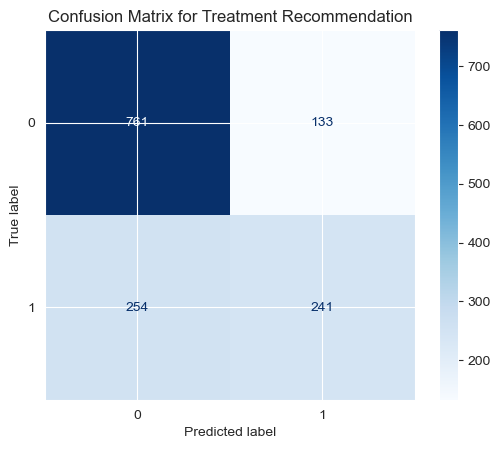

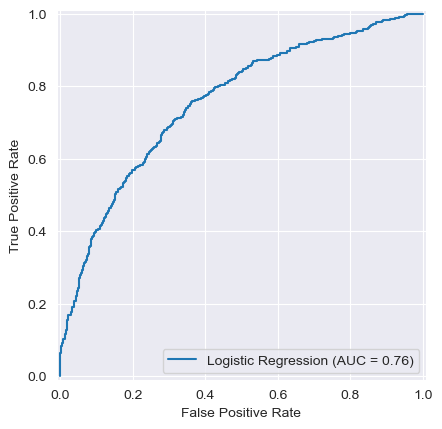

In [25]:
evaluate_model(reg1, valid_x, valid_y)

## Simple GridSearch

Best parameters found:  {'C': 1, 'max_iter': 3000, 'penalty': 'l1'}
Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       894
           1       0.64      0.49      0.55       495

    accuracy                           0.72      1389
   macro avg       0.70      0.67      0.68      1389
weighted avg       0.71      0.72      0.71      1389



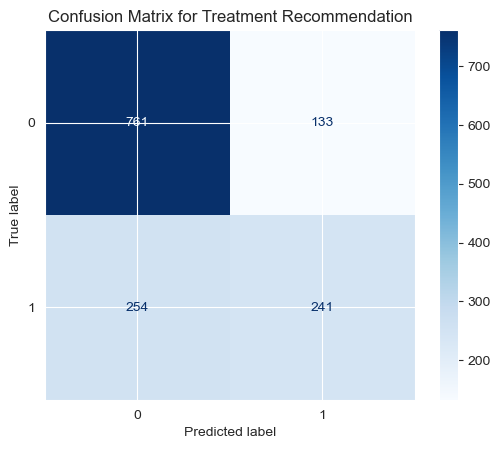

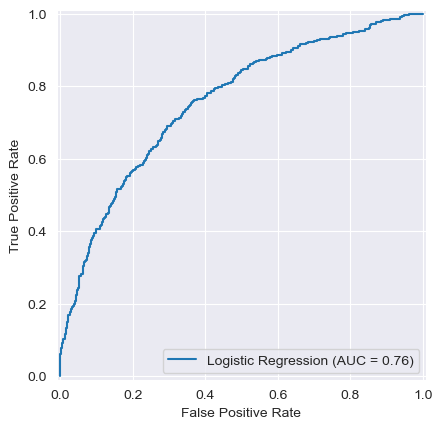

In [26]:
parameters = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'max_iter': [3000, 5000, 10000, 20000]}

lr2 = LogisticRegression(solver='saga')
grid_search = GridSearchCV(lr2, param_grid=parameters, scoring='roc_auc', n_jobs=-1)
grid_search.fit(train_x, train_y)
print("Best parameters found: ", grid_search.best_params_)

best_model = grid_search.best_estimator_

evaluate_model(best_model, valid_x, valid_y)

## Polynomial features 2

Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       894
           1       0.84      0.75      0.79       495

    accuracy                           0.86      1389
   macro avg       0.85      0.84      0.84      1389
weighted avg       0.86      0.86      0.86      1389



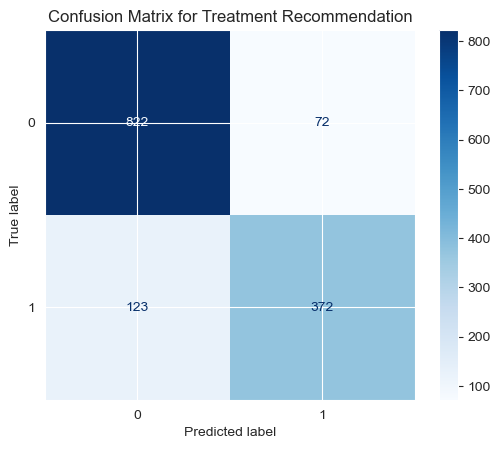

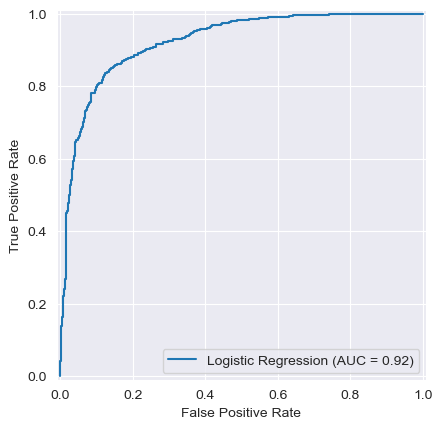

In [45]:
lr3 = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=2)),
    ('standard_scaler', StandardScaler()),
    ('ridge_regression', LogisticRegression(max_iter=3000, solver='saga', C=1, penalty='l1'))
])

lr3.fit(train_x, train_y)
evaluate_model(lr3, valid_x, valid_y)

## Polynomial features 3

Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       894
           1       0.83      0.81      0.82       495

    accuracy                           0.87      1389
   macro avg       0.86      0.86      0.86      1389
weighted avg       0.87      0.87      0.87      1389



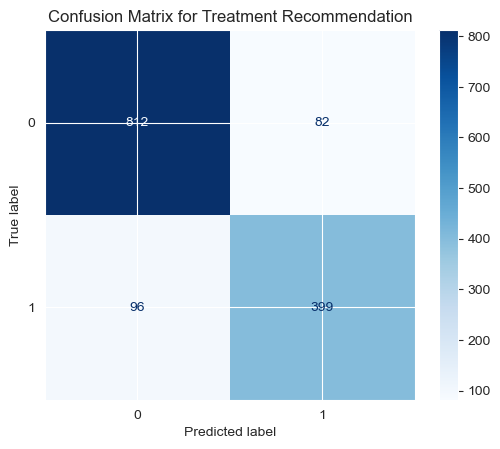

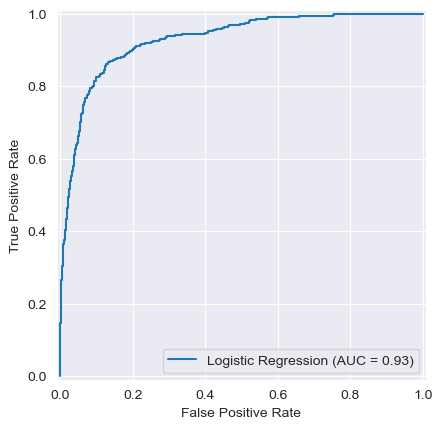

In [113]:
lr3 = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=3)),
    ('standard_scaler', StandardScaler()),
    ('ridge_regression', LogisticRegression(max_iter=10000, solver='saga'))
])

lr3.fit(train_x, train_y)
evaluate_model(lr3, valid_x, valid_y)

## Look for the most important features

In [46]:

model = LogisticRegression(max_iter=5000, solver='saga', C=1, penalty='l1')

selector = RFECV(estimator=model, n_jobs=-1, scoring='roc_auc')

selector = selector.fit(train_x, train_y)
print("Optimal number of features: ", selector.n_features_)
print("Best features: ", selector.support_)
print("Feature ranking: ", selector.ranking_)
print("Selected features: ", train_x.columns[selector.support_])

Optimal number of features:  13
Best features:  [ True  True False ... False  True False]
Feature ranking:  [1 1 2 ... 4 1 5]
Selected features:  Index(['age', 'blood_pressure', 'TestB', 'c0', 'c1', 'c2', 'c3', 'c4', 'c5',
       'c6', 'c7', 'c9', 'c11'],
      dtype='object')


In [47]:
def map_onehot_features_to_original():
    sample_data = dataset.copy()
    onehot_encoder = OneHotEncoder(sparse_output=False)
    onehot_encoder.fit(sample_data[cat_features])
    feature_categories = onehot_encoder.categories_
    mapping = {}
    idx = 0
    for i, feature in enumerate(cat_features):
        for category in feature_categories[i]:
            mapping[f'c{idx}'] = f'{feature}_{category}'
            idx += 1
    return mapping


onehot_mapping = map_onehot_features_to_original()

selected_features = train_x.columns[selector.support_]
mapped_features = []

for feature in selected_features:
    if feature.startswith('c'):
        mapped_features.append(onehot_mapping.get(feature, feature))
    else:
        mapped_features.append(feature)

print("Selected features mapped to original names:")
for feature in mapped_features:
    print(f"- {feature}")

Selected features mapped to original names:
- age
- blood_pressure
- TestB
- gender_female
- gender_non-female
- blood_test_negative
- blood_test_positive
- family_history_False
- family_history_True
- family_history_nan
- GeneA_double
- GeneA_single
- GeneB_1


# Kaggle submission

In [131]:
def transform_kaggle(input_data, cathegorical_variable_names):
    """Define the full preprocessing pipline."""

    input_data.drop("Id", axis=1, inplace=True)
    ordinal_encoder = sklearn.preprocessing.OrdinalEncoder()
    encoded = ordinal_encoder.fit_transform(input_data[cathegorical_variable_names])
    onehot_encoder = sklearn.preprocessing.OneHotEncoder()
    one_hot = onehot_encoder.fit_transform(input_data[cathegorical_variable_names]).toarray()

    independent = input_data.drop(cathegorical_variable_names, axis=1)
    width = one_hot.shape[-1]
    onehot_names = [f'c{i}' for i in range(width)]
    independent[onehot_names] = one_hot

    return independent

Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       924
           1       0.79      0.79      0.79       507

    accuracy                           0.85      1431
   macro avg       0.84      0.84      0.84      1431
weighted avg       0.85      0.85      0.85      1431



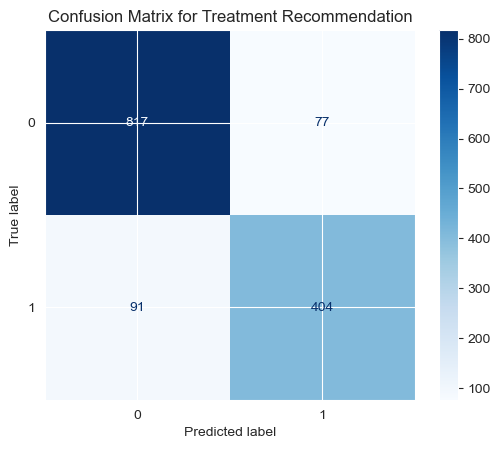

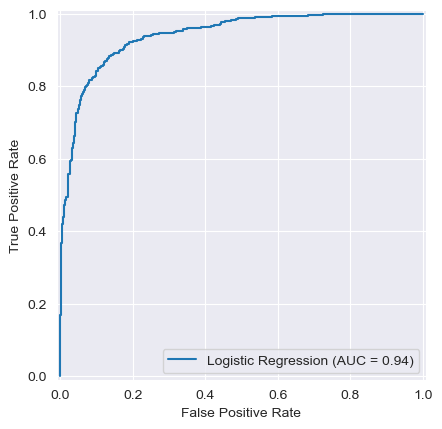

In [133]:
model = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=3)),
    ('standard_scaler', StandardScaler()),
    ('ridge_regression', LogisticRegression(max_iter=10000, solver='saga'))
])

model.fit(pd.concat([train_x, valid_x]), pd.concat([train_y, valid_y]))
evaluate_model(model, test_x, test_y)

In [124]:
# Predict on kaggle csv
kaggle_dataset = pd.read_csv('data/ps2_kaggle_predict.csv')
X = transform_kaggle(
    kaggle_dataset,
    cathegorical_variable_names=cat_features
)

In [128]:
predicted = model.predict(X)
pd.DataFrame(predicted, columns=['Id', 'Predicted'], ).to_csv('data/ps2_predicted.csv')